In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file='/content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='/content/frozen_inference_graph.pb'

In [4]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels=[]
file_name='/content/labels.txt'
with open(file_name,'rt') as fpt:
  classLabels=fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
len(classLabels)

80

In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x78f5880cebf0>

Image shape: (183, 275, 3)


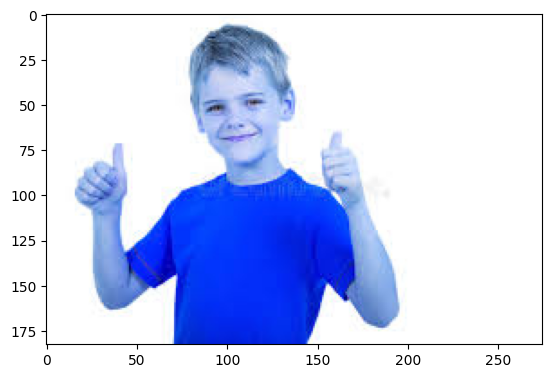

In [9]:
img=cv2.imread('/content/images.jpeg')
plt.imshow(img)
if img is None:
    print("Error: Image not loaded.")
else:
    # Print image shape
    print("Image shape:", img.shape)

In [10]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5)

In [11]:
print(ClassIndex)

[1]


In [12]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
  cv2.rectangle(img,boxes,(255,0,0),2)
  cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

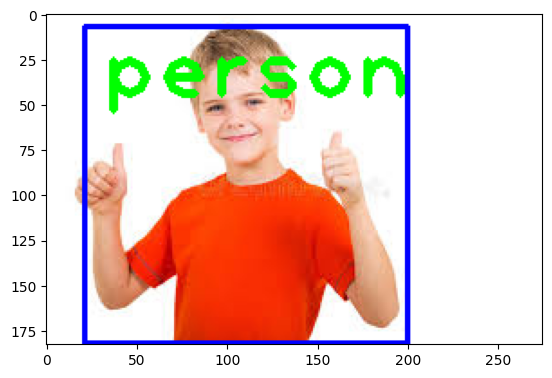

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [14]:
## For Video

# import cv2
# from google.colab.patches import cv2_imshow

#cap = cv2.VideoCapture("/content/video_s.mp4")
#if not cap.isOpened():
#    cap = cv2.VideoCapture(0)
#if not cap.isOpened():
 #   raise IOError('Can\'t open video')

#font_scale = 3
#font = cv2.FONT_HERSHEY_PLAIN

#while True:
#    ret, frame = cap.read()
#    if not ret:
#        print("Can't receive frame (stream end?). Exiting ...")
#        break

#    ClassIndex, confidece, bbox = model.detect(frame, confThreshold=0.5)
#    print(ClassIndex)

#    if len(ClassIndex) != 0:
#        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
#            if ClassInd <= 80:  # Assuming 80 is the maximum class index
#                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
#                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40),
#                            font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

#    cv2_imshow(frame)  # Use cv2_imshow instead of cv2.imshow

#    if cv2.waitKey(2) & 0xFF == ord('q'):
#       break

#cap.release()
#cv2.destroyAllWindows()
